# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Dataset

In [2]:
dataset = pd.read_csv('KNN_Project_Data')

In [3]:
dataset.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


## Now we need to scale the data, since KNN needs scaled data

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaled_features = scaler.fit(dataset.drop('TARGET CLASS', axis=1))

In [7]:
scaled_features = scaler.transform(dataset.drop('TARGET CLASS', axis=1))

In [9]:
new_dataset = pd.DataFrame(scaled_features, columns=dataset.columns[:-1])

In [10]:
new_dataset.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


## Its time to split the data

In [11]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(scaled_features,dataset['TARGET CLASS'],test_size=0.25,random_state=101)

### Let us initialize our classifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [21]:
pred = classifier.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[88 36]
 [29 97]]
             precision    recall  f1-score   support

          0       0.75      0.71      0.73       124
          1       0.73      0.77      0.75       126

avg / total       0.74      0.74      0.74       250



### We have f1 score of 0.74 which is certainly very very low. Lets see different neighbors

In [37]:
error_metric =[]
for i in range(1,50):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    error_metric.append(np.mean(pred!=y_test))

In [38]:
## time to plot the data

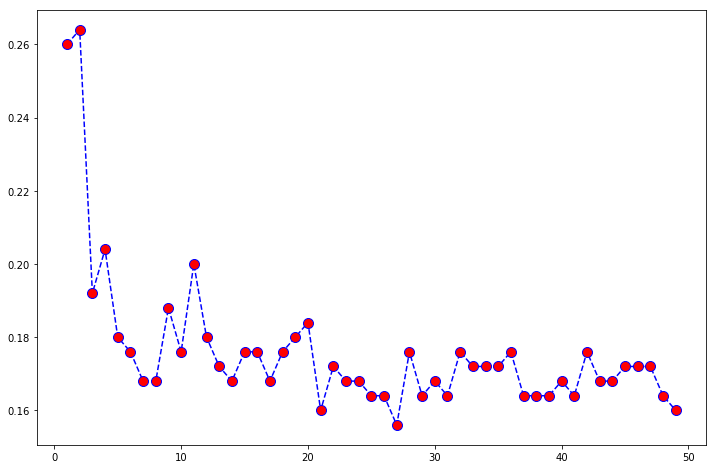

In [39]:
plt.figure(figsize=(12,8))
plt.plot(range(1,50),error_metric,color='blue',ls='--',marker='o',markersize=10,markerfacecolor='red')

In [30]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
classifier = KNeighborsClassifier(n_neighbors=1)

classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[88 36]
 [29 97]]


             precision    recall  f1-score   support

          0       0.75      0.71      0.73       124
          1       0.73      0.77      0.75       126

avg / total       0.74      0.74      0.74       250



In [41]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
classifier = KNeighborsClassifier(n_neighbors=21)

classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)

print('WITH K=28')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=28


[[101  23]
 [ 17 109]]


             precision    recall  f1-score   support

          0       0.86      0.81      0.83       124
          1       0.83      0.87      0.84       126

avg / total       0.84      0.84      0.84       250

